# 데이터셋 다운로드
- 아래의 데이터들을 다운로드 후, colab 세션 저장소에 업로드하여 사용
 - [train data](https://drive.google.com/file/d/16dY9fTOyBnx1TvIzmbjbLmUZ2n6HbjqZ/view?usp=sharing)
 - [test data](https://drive.google.com/file/d/168qGvi5w4Wwgu5QTpPoLkZzoJNAgyc6b/view?usp=sharing)

- 혹은 훈련된 모델을 직접 다운로드 (모델 테스트를 하기 위해선 테스트 데이터 다운로드 필요)
 - [best_model_balanced_dropout2.h5](https://drive.google.com/file/d/1HPh-bbwSwh5vs9zif0CPDT0-ZErBrUYL/view?usp=sharing)

In [5]:
# Loading dataset
import pandas as pd
train = pd.read_csv('./balanced_train_data.csv')
test = pd.read_csv('./preprocessed_test_data.csv')

   Unnamed: 0    Genre                                             Lyrics
0           0  Country  my christmas list grows shorter every year thi...
1           1  Country  it keeps running down the tear stained face of...
2           2  Country  chestnuts roasting on an open fire jack frost ...
3           3  Country  go tell it on the mountain over the hills and ...
4           4  Country  i work down at ashbury hill minimum wage but i...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


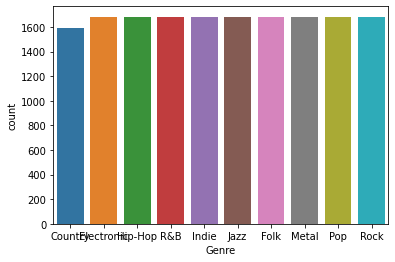

In [9]:
# train 데이터셋 확인
import seaborn as sns
print(train.head())
sns.countplot(train['Genre'])

   Unnamed: 0    Genre                                             Lyrics
0           0  Hip-Hop  most folks spend their days daydreaming of fin...
1           1    Indie  take your cold hands and put them on my face s...
2           2    Metal  are you ready it s time for war we ll break do...
3           3      Pop  you ask me why i change the color of my hair y...
4           4  Hip-Hop  do you believe in magic in a young girl s hear...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


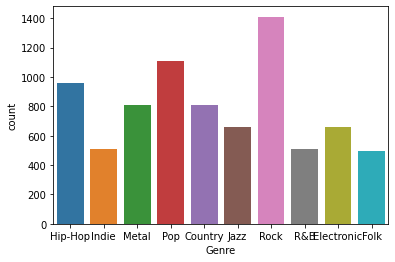

In [10]:
print(test.head())
sns.countplot(test['Genre'])

In [11]:
import numpy as np
# X_train, y_train 형태로 만들기
# X_train
X_train = []
for lyric in train['Lyrics']:
  words = lyric.split()
  X_train.append(words)

# y_train
y_train = np.array(train['Genre'])

# X_test
X_test = []
for lyric in test['Lyrics']:
  words = lyric.split()
  X_test.append(words)

# y_test
y_test = np.array(test['Genre'])

In [12]:
# 정수 인코딩
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print('단어집합의 크기: ', len(tokenizer.word_index))

단어집합의 크기:  52008


In [13]:
# 등장 빈도수가 THRESHOLD 미만인 단어가 얼만큼의 비중을 차지하는지 확인
def GetRareWordRatio(vocab, threshold):
  total_cnt = len(vocab.word_index)
  rare_cnt = 0
  total_freq = 0
  rare_freq = 0

  for key, value in vocab.word_counts.items():
    total_freq += value
    if (value < threshold):
      rare_cnt += 1
      rare_freq += value
  
  print('단어 집합(vocabulary)의 크기 :',total_cnt)
  print('등장 빈도가 %s번 미만인 희귀 단어의 수: %s'%(threshold, rare_cnt))
  print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
  print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

In [14]:
# threshold = 5 확인
GetRareWordRatio(tokenizer, 5)

단어 집합(vocabulary)의 크기 : 52008
등장 빈도가 5번 미만인 희귀 단어의 수: 34755
단어 집합에서 희귀 단어의 비율: 66.82625749884633
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.285983740310148


train 데이터셋에서 등장 빈도가 *5번* 미만인 희귀 단어는 전체 데이터셋에서 1% 정도 등장하지만, 전체 단어 집합에서 66% 이상을 차지한다.   
이들을 제외함으로써 단어집합의 크기를 크게 줄일 수 있다.


In [15]:
vocab_size = 52008 - 34755 + 2  # unk, pad 토큰을 고려하여 +2
print('vocab_size: ', vocab_size)

vocab_size:  17255


In [16]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)

In [17]:
# 이렇게 만든 단어집합으로 가사를 정수인코딩
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [18]:
# y 정수 인코딩
label_vocab = {'Hip-Hop': 0,
               'Indie': 1,
               'Metal': 2,
               'Pop': 3,
               'Country': 4,
               'Jazz': 5,
               'Rock': 6,
               'R&B': 7,
               'Electronic': 8,
               'Folk': 9}

# y_train
y_train_encoded = []
for word in y_train:
  y_train_encoded.append(label_vocab[word])

y_train = np.array(y_train_encoded)

# y_test
y_test_encoded = []
for word in y_test:
  y_test_encoded.append(label_vocab[word])

y_test = np.array(y_test_encoded)

max length :  2106
average length :  262.97975031360136


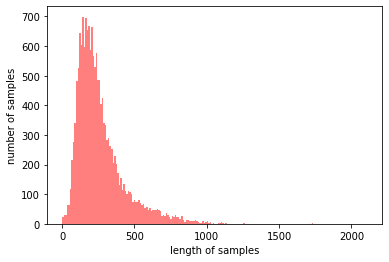

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
# 훈련 데이터의 가사 길이 분포 확인
print('max length : ', max(len(i) for i in X_train))
print('average length : ', sum(map(len, X_train))/len(X_train))

plt.hist([len(s) for s in X_train], bins=200, alpha=0.5, color='r')
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [20]:
# 전체 샘플 중 길이가 max_len이하인 샘플의 비율이 몇 %인지 확인하는 함수
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [21]:
below_threshold_len(500, X_train)
below_threshold_len(500, X_test)

전체 샘플 중 길이가 500 이하인 샘플의 비율: 90.80102741771698
전체 샘플 중 길이가 500 이하인 샘플의 비율: 91.4649520927887


샘플의 길이를 지나치게 크게 잡을경우 딥러닝 모델 학습시 사용되는 메모리가 지나치게 커진다.    
따라서 학습에 사용할 문장의 길이를 전체 샘플의 90% 이상에 해당하는 길이인 500로 결정한다.

In [22]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
FIX_LEN = 500
X_train = pad_sequences(X_train, FIX_LEN)
X_test = pad_sequences(X_test, FIX_LEN)

In [23]:
# 데이터를 랜덤한 순서로 섞어준다.
s = np.arange(X_train.shape[0])
np.random.shuffle(s)

X_train = X_train[s]
y_train = y_train[s]

In [24]:
# 데이터의 shape 확인
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16741, 500)
(16741,)
(7932, 500)
(7932,)


In [25]:
# 모델 정의
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, LSTM, RNN, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.regularizers import l2
from tensorflow.keras.layers import Dropout

gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    input_length=FIX_LEN,
                    output_dim=128,
                    mask_zero=True))
model.add(Dropout(0.5))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.summary()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          2208640   
                                                                 
 dropout (Dropout)           (None, 500, 128)          0         
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 2,341,514
Trainable params: 2,341,514
Non-trainable params: 0
_____________________________________________

In [26]:
# 모델 학습
mc = ModelCheckpoint('best_model_balanced_dropout2.h5',
                     monitor='val_accuracy',
                     mode='max',
                     verbose=1,
                     save_best_only=True
)

es = EarlyStopping(monitor='val_loss',
                   mode='auto',
                   verbose=1,
                   patience=5
)

lrr = ReduceLROnPlateau(monitor='val_accuracy',
                        patience=3,
                        verbose=1,
                        factor=0.25,
                        min_lr=0.0000001
)

history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=100,
                    validation_split=0.2,
                    callbacks=[mc, es, lrr])

Epoch 1/20
134/134 [==============================] - ETA: 0s - loss: 2.2774 - accuracy: 0.1389
Epoch 00001: val_accuracy improved from -inf to 0.17289, saving model to best_model_balanced_dropout2.h5
134/134 [==============================] - 397s 3s/step - loss: 2.2774 - accuracy: 0.1389 - val_loss: 2.2108 - val_accuracy: 0.1729 - lr: 0.0010
Epoch 2/20
134/134 [==============================] - ETA: 0s - loss: 2.1052 - accuracy: 0.2434
Epoch 00002: val_accuracy improved from 0.17289 to 0.23559, saving model to best_model_balanced_dropout2.h5
134/134 [==============================] - 380s 3s/step - loss: 2.1052 - accuracy: 0.2434 - val_loss: 2.0797 - val_accuracy: 0.2356 - lr: 0.0010
Epoch 3/20
134/134 [==============================] - ETA: 0s - loss: 1.9600 - accuracy: 0.2996
Epoch 00003: val_accuracy did not improve from 0.23559
134/134 [==============================] - 365s 3s/step - loss: 1.9600 - accuracy: 0.2996 - val_loss: 2.1022 - val_accuracy: 0.2314 - lr: 0.0010
Epoch 4/2

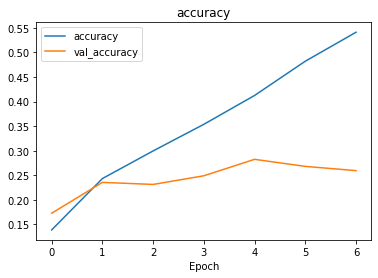

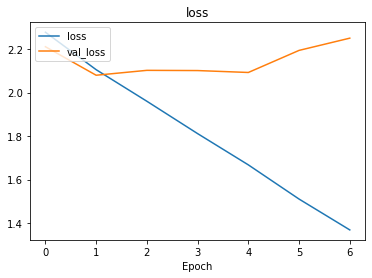

In [27]:
# plot
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('Epoch')
# plt.ylim(0, 1)
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [28]:
# 테스트 데이터로 정확도 측정
loaded_model = tf.keras.models.load_model('best_model_balanced_dropout2.h5')
loaded_model.evaluate(X_test, y_test, verbose=1)

from sklearn.metrics import classification_report

y_pred = loaded_model.predict(X_test, batch_size=1000, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

8/8 [==============================] - 4s 291ms/step
              precision    recall  f1-score   support

           0       0.63      0.72      0.67       960
           1       0.11      0.35      0.17       510
           2       0.43      0.63      0.51       810
           3       0.27      0.08      0.12      1110
           4       0.31      0.34      0.32       810
           5       0.24      0.29      0.26       659
           6       0.26      0.03      0.06      1410
           7       0.13      0.26      0.18       509
           8       0.17      0.10      0.13       659
           9       0.15      0.14      0.15       495

    accuracy                           0.28      7932
   macro avg       0.27      0.29      0.26      7932
weighted avg       0.29      0.28      0.26      7932

